In [228]:
import numpy
import pandas as pd
import matplotlib.pyplot as plt
import os
import sys
import math
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from lib.data.RedDotsData import RedDotsData
from lib.data.RedDotsManualData import RedDotsManualData
from lib.data.RedDotsRawData import RedDotsRawData
from lib.FolderStructure import FolderStructure
from lib.data.DriftData import DriftData

#rootDir ="C:/workspaces/AnjutkaVideo/Kara_Sea_Crab_Video_st_5993_2018/"
#videoFileName = "V3__R_20180915_205551"
#videoFileName = "V4__R_20180915_210447"
#videoFileName = "V6__R_20180915_212238"

rootDir ="C:/workspaces/AnjutkaVideo/2019-Kara/St6236_19"
videoFileName = "V1"

#rootDir ="C:/workspaces/AnjutkaVideo/2019-Kara/St6279_19"
#videoFileName = "V2"


#rootDir = "C:/workspaces/AnjutkaVideo/KaraSeaCrabVideoBlagopoluchiyaBay2018/"
#videoFileName = "V3_R_20180911_170159"
#videoFileName = "V2_R_20180911_165730"
#videoFileName = "V1_R_20180911_165259"

folderStruct = FolderStructure(rootDir, videoFileName)

drifts = DriftData.createFromFolderStruct(folderStruct)
maxFrameID = drifts.maxFrameID()
minFrameID = drifts.minFrameID()
#maxFrameID = 49
#minFrameID = 36281

redDotsManual = RedDotsManualData(folderStruct)
redDotsRaw = RedDotsRawData(folderStruct)

rdd = RedDotsData.createFromFolderStruct(folderStruct) #.getRedDotsFilepath())
rdd.getCount()

26813

In [229]:
df = rdd.getPandasDF()
#rdd.saveInterpolatedDFToFile(minFrameID, maxFrameID+1)
rdd.getCount()
#df.head(10)

26813

In [230]:
#find dups
len(df[df.duplicated("frameNumber",keep=False)].index)

0

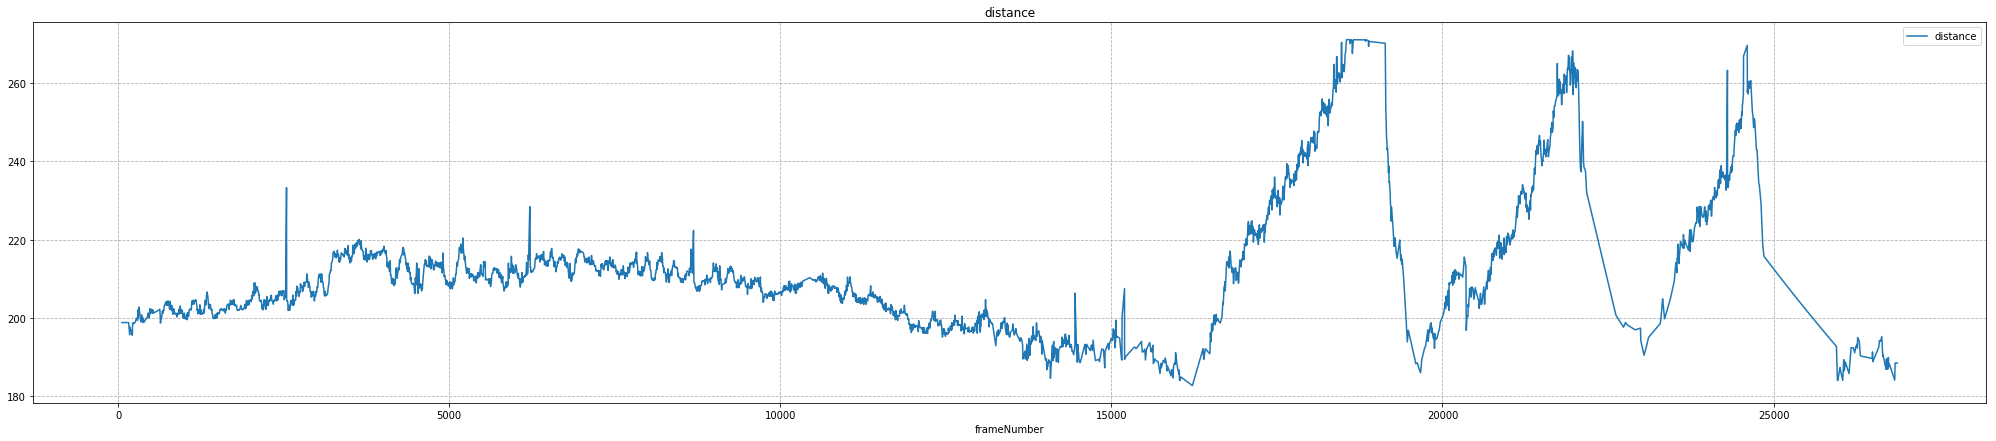

In [231]:
df.plot(x='frameNumber', y=['distance'],figsize=(35,7), title="distance")
plt.gca().grid(which='major', axis='both', linestyle='--') #specify grid lines

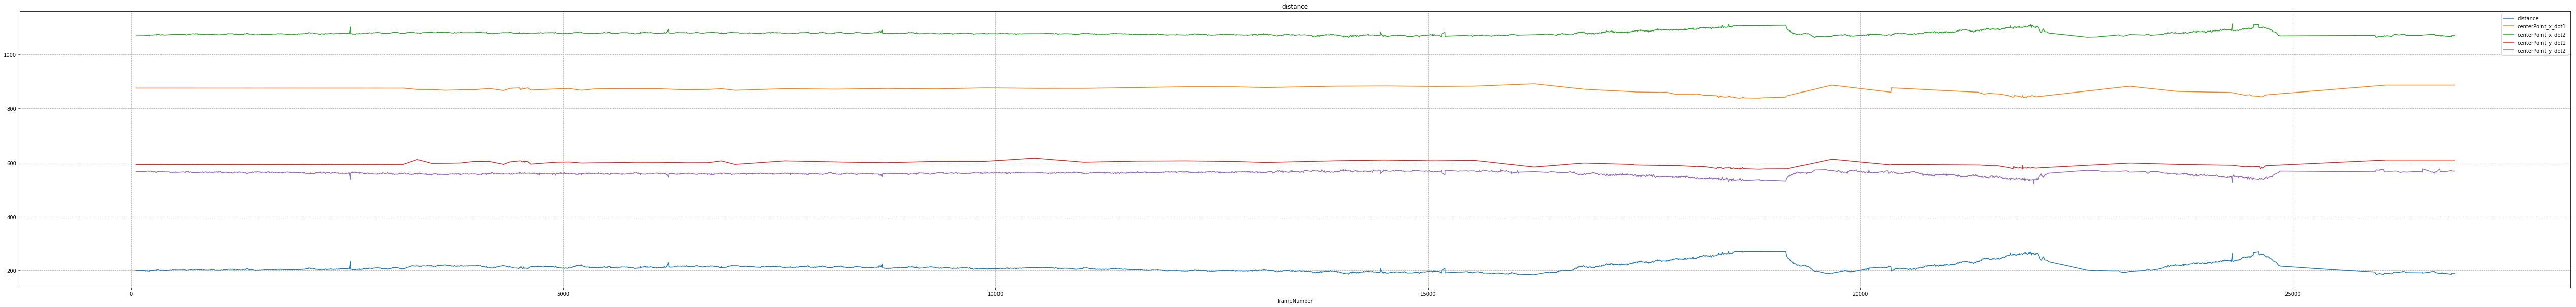

In [232]:
df.plot(x='frameNumber', y=['distance','centerPoint_x_dot1', 'centerPoint_x_dot2','centerPoint_y_dot1', 'centerPoint_y_dot2'],figsize=(90,10), title="distance")
plt.gca().grid(which='major', axis='both', linestyle='--') #specify grid lines

In [233]:
manualDF = redDotsManual.getPandasDF().copy()
redDotsManual.getCount()

90

In [234]:
rawDF = redDotsRaw.getPandasDF().copy()
redDotsRaw.getCount()

3890

In [235]:
dfToPlot = redDotsManual.forPlotting()
dfToPlot.count()[0] #head(10)

3813

In [236]:
lowerFrameID = minFrameID
upperFrameID = maxFrameID
#lowerFrameID = 49
#upperFrameID = 36281

#lowerFrameID = 4000
#upperFrameID = 6000
zoomDF = dfToPlot.loc[dfToPlot['frameNumber'] > lowerFrameID].loc[dfToPlot['frameNumber'] < upperFrameID]

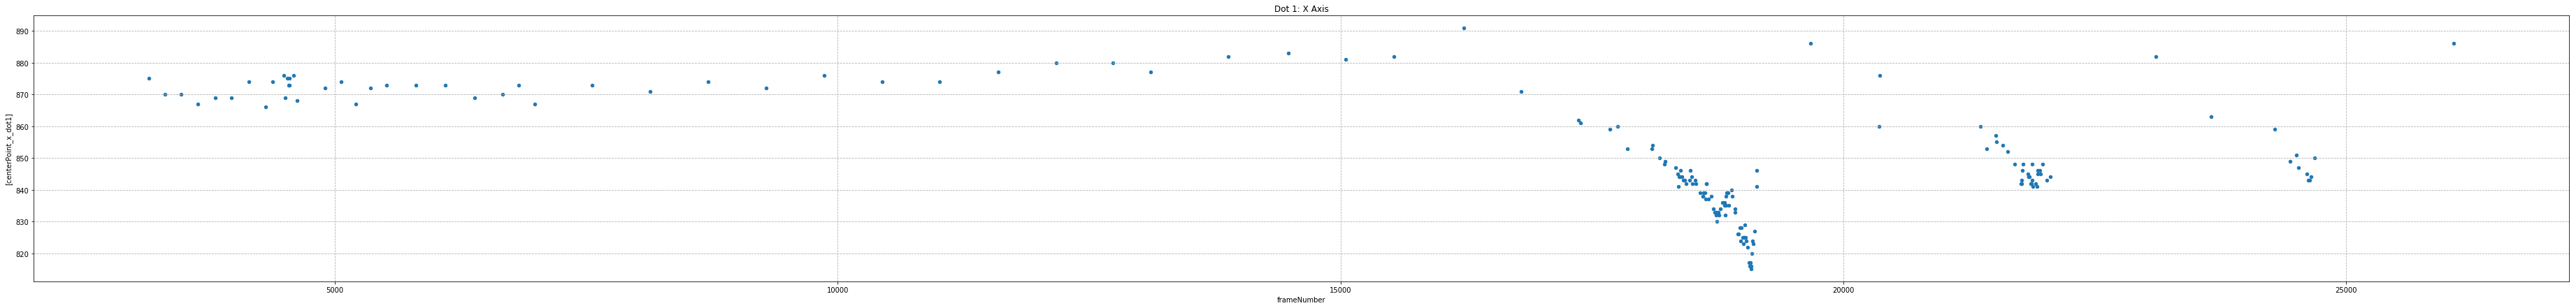

In [237]:
zoomDF.plot.scatter(x='frameNumber', y=['centerPoint_x_dot1'],figsize=(65,7), title="Dot 1: X Axis")
plt.gca().grid(which='major', axis='both', linestyle='--') #specify grid lines

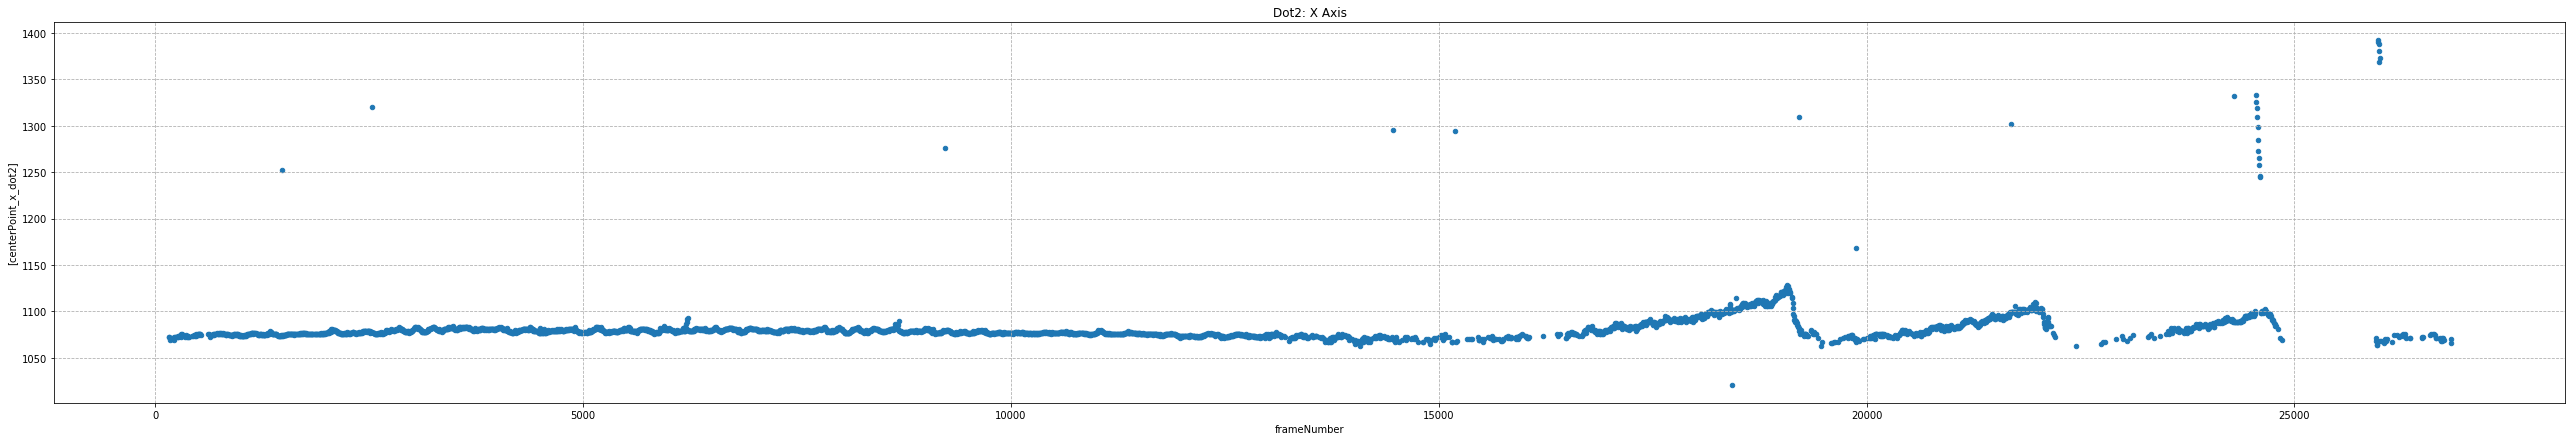

In [238]:
zoomDF.plot.scatter(x='frameNumber', y=['centerPoint_x_dot2'],figsize=(45,7), title="Dot2: X Axis")
plt.gca().grid(which='major', axis='both', linestyle='--') #specify grid lines

In [239]:
dataRedDot2 = redDotsManual.combinedOnlyRedDot2()
dataRedDot2.count()[0]

3758

In [240]:
#dataRedDot2 = replaceOutlierBetweenTwo(dataRedDot2, 'centerPoint_x')
dataRedDot1 = redDotsManual.combinedOnlyRedDot1()
dataRedDot1.count()[0]
#dataRedDot1['frameNumber']


128

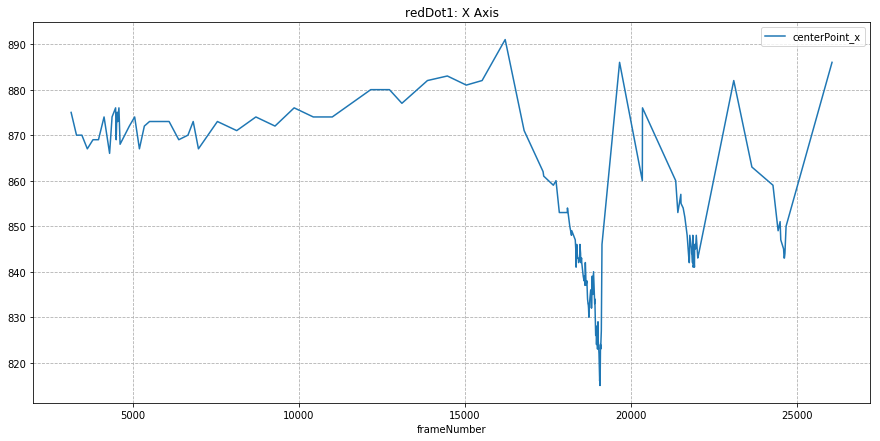

In [241]:
dataRedDot1.plot(x='frameNumber', y=['centerPoint_x'],figsize=(15,7), title="redDot1: X Axis")
plt.gca().grid(which='major', axis='both', linestyle='--') #specify grid lines

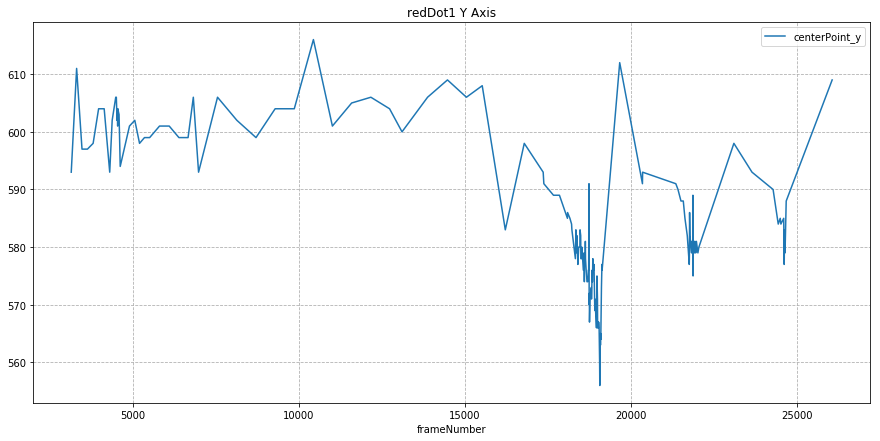

In [242]:
dataRedDot1.plot(x='frameNumber', y=['centerPoint_y'],figsize=(15,7), title="redDot1 Y Axis")
plt.gca().grid(which='major', axis='both', linestyle='--') #specify grid lines

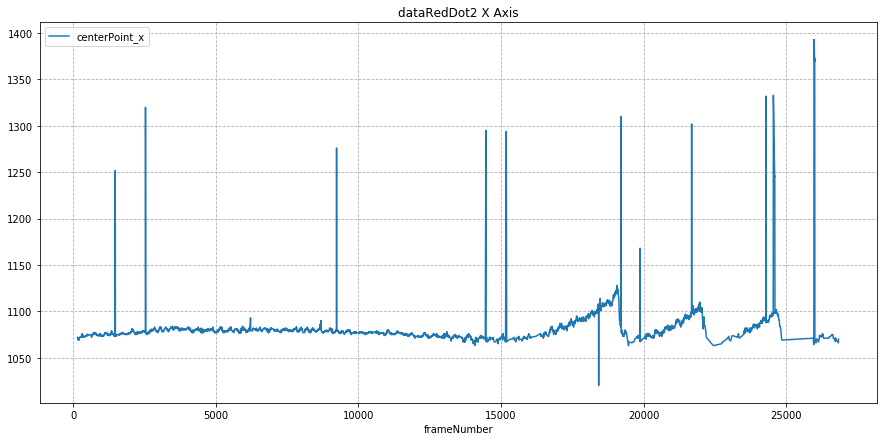

In [243]:
dataRedDot2.plot(x='frameNumber', y=['centerPoint_x'],figsize=(15,7), title="dataRedDot2 X Axis")
plt.gca().grid(which='major', axis='both', linestyle='--') #specify grid lines

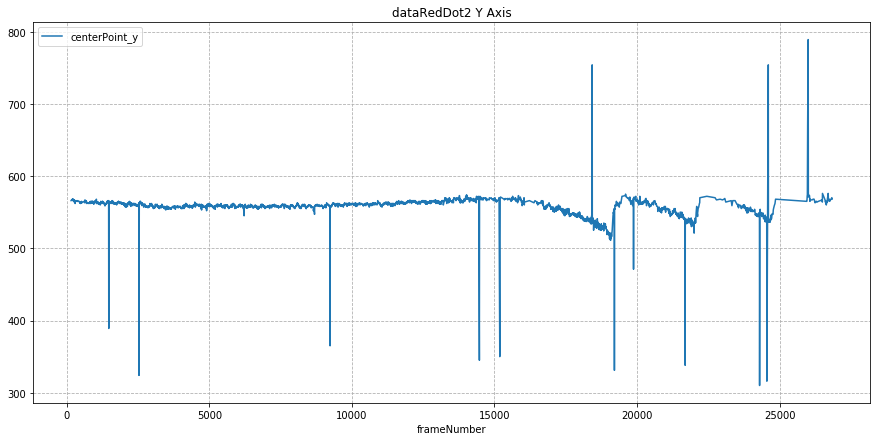

In [244]:
dataRedDot2.plot(x='frameNumber', y=['centerPoint_y'],figsize=(15,7), title="dataRedDot2 Y Axis")
plt.gca().grid(which='major', axis='both', linestyle='--') #specify grid lines

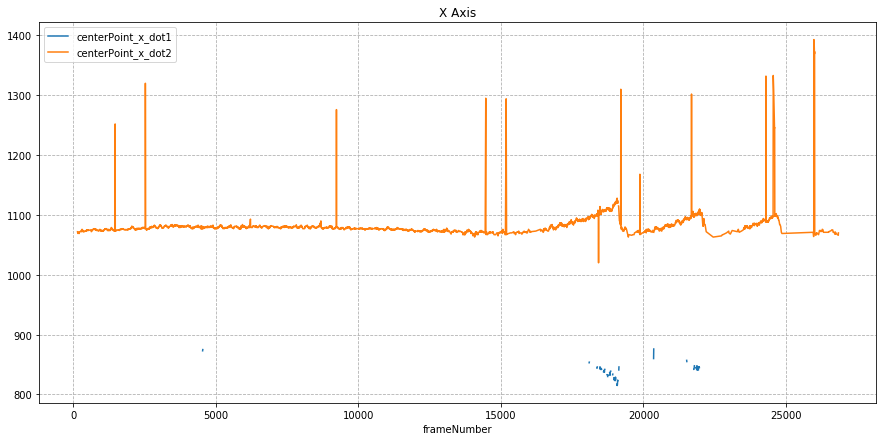

In [245]:
dfToPlot.plot(x='frameNumber', y=['centerPoint_x_dot1','centerPoint_x_dot2'],figsize=(15,7), title="X Axis")
plt.gca().grid(which='major', axis='both', linestyle='--') #specify grid lines

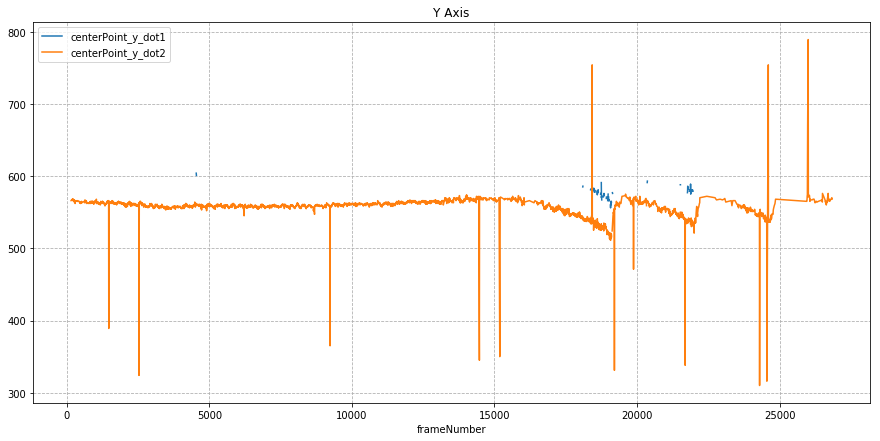

In [246]:
dfToPlot.plot(x='frameNumber', y=['centerPoint_y_dot1','centerPoint_y_dot2'],figsize=(15,7), title="Y Axis")
plt.gca().grid(which='major', axis='both', linestyle='--') #specify grid lines

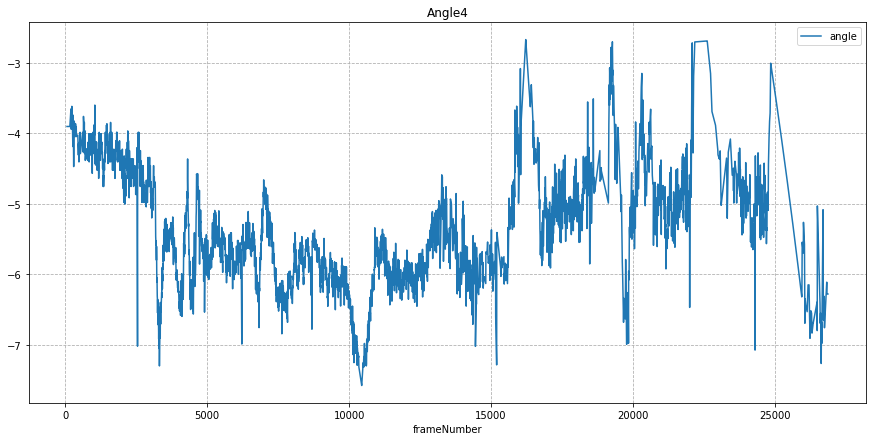

In [247]:
rd_data = RedDotsData(folderStruct)
df_intr = rd_data.getPandasDF()
#df_intr["yLength"] = (df_intr["centerPoint_y_dot1"] - df_intr["centerPoint_y_dot2"])
#df_intr["xLength"] = (df_intr["centerPoint_x_dot1"] - df_intr["centerPoint_x_dot2"])
#df_intr["tan_angle"] = df_intr["yLength"]/df_intr["xLength"]
#df_intr["angle"] = numpy.arctan(df_intr["tan_angle"])
#df_intr["angle_deg"] = numpy.arctan(df_intr["tan_angle"])/math.pi*90 


df_intr.plot(x='frameNumber', y=[ 'angle'],figsize=(15,7), title="Angle4")
plt.gca().grid(which='major', axis='both', linestyle='--') #specify grid lines

In [248]:
len(df_intr.index)

26813

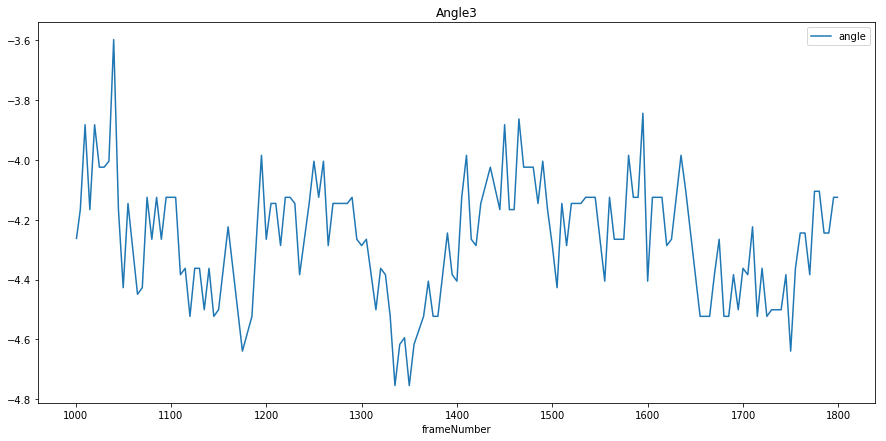

In [249]:
df_intr.loc[df_intr['frameNumber'] > 1000].loc[df_intr['frameNumber'] < 1800].plot(x='frameNumber', y=['angle'],figsize=(15,7), title="Angle3")

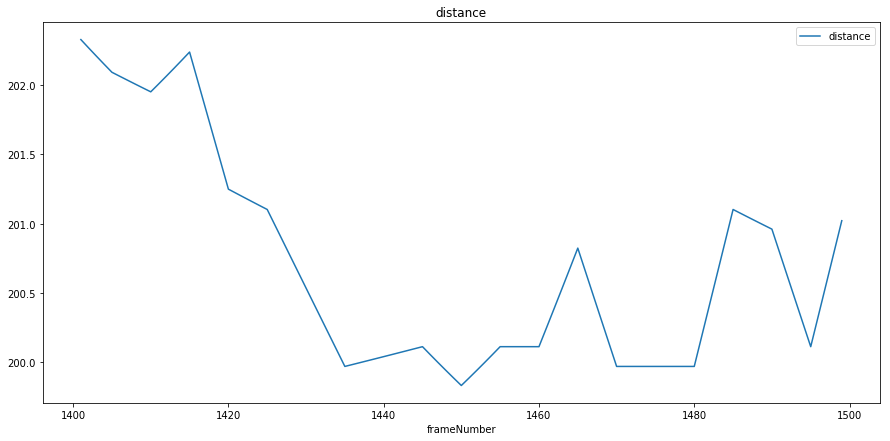

In [250]:
df_intr.loc[df_intr['frameNumber'] > 1400].loc[df_intr['frameNumber'] < 1500].plot(x='frameNumber', y=['distance'],figsize=(15,7), title="distance")


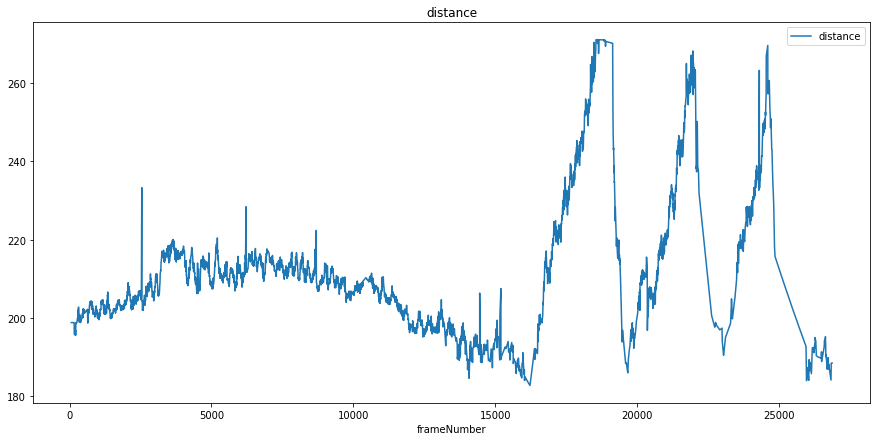

In [251]:
df_intr.loc[df_intr['frameNumber'] > 0].loc[df_intr['frameNumber'] < 150000].plot(x='frameNumber', y=['distance'],figsize=(15,7), title="distance")

In [252]:
numpy.percentile(df_intr["distance"], 99)

270.88817704290466

In [253]:
numpy.percentile(df_intr["distance"], 50)

208.25127608747883

In [254]:
numpy.percentile(df_intr["distance"], 1)

184.87843401359828

In [255]:
numpy.percentile(df_intr["distance"], 98)

270.144212149591

In [256]:
numpy.percentile(df_intr["distance"], 95)


254.64400079661596

In [257]:
numpy.percentile(df_intr["distance"], 5)



189.29507748044537